# Data 201A Individual Project 

## Project Name: Desirable Mate Characteristics Exploratory Analysis
## Name: Sophia Zhang

Welcome to my Data 201A Individual Project Jupyter notebook

In this project I will be analyzing speed dating data collected by Columbia University researchers
to determine characterstics that modern humans look for in a potential partner.

Purpose:  The objective of this project is to determine which variables are correlated with high desirability
in relationships and how they change between people with different attributes.

Dataset:  Source: https://www.kaggle.com/annavictoria/speed-dating-experiment

Background: The dataset is from the paper Gender Differences in Mate Selection by Columbia Business School professors Ray Fisman and Sheena Iyengar. Data was gathered from 552 participants in experimental speed dating events from 2002-2004. The attendees had four minute "first date" with every other participant of the opposite sex. They were also asked to rate their date on six attributes. The dataset also includes questionnaire data about demographics, self-perception across key attributes, beliefs on what others find valuable in a mate and lifestyle information. 

Methodology: The data was filtered based on meaningful variables (see below) which are hypothesized to have an impact on a match. Because we want a full picture of an individuals preferences, rows with with NA values for questions that were not answered were dropped. Relationships and correlations between variables were investigated using heat maps, scatterplots, histograms and comparative plots.

Descriptions of data: There are 8,378 rows/observations and 195 columns in total. After cleaning and filter, the data set has 2973 rows × 31 columns. 

Variables include rankings for following attributes:
Attractiveness
Sincerity
Intelligence
Fun
Ambition
Shared Interests

Personal information for:
gender
age
income

Questions I asked:

Which of the 6 variables are most important to people looking for a potential partner? 
Do matches change among people of different age, gender and income?
Do people's interests reflect their actual decision for a date?

We are interested in these variables (Defining the variables):

General variables:

id: participant id <br>
pid: date's id <br>
gender: participant gender, Female=0 Male=1 <br>
match: whether participant matched with his/her date (match=1 (both decision=1), no match=0) <br>
int_corr: the correlation coefficient between the participant's interests and their dates' interests <br>
age: age of the participant <br>
income: annual income of participlant <br>
dec: decision of the participant (yes to second date; decision=1, no;decision=0) <br>
age_o: age of the date <br>
dec_o: decision of the date <br>

Attractiveness rating: <br>
attr1_1: how important is attractiveness to you in a date <br>
attr: how attractive you find your date <br>
attr_o: how attractive your date finds you <br>

Sincerity rating: <br>
sinc1_1:how important is sincerity to you in a date<br>
sinc: how sincere you find your date <br>
sinc_o: how sincere your date finds you<br>

Intelligence rating:<br>
intel1_1:how important is intelligence to you in a date<br>
intel:how intelligent you find your date<br>
intel_o: how intelligent your date finds you<br>

Fun rating<br>
fun1_1:how important is fun to you in a date<br>
fun: how fun you find your date<br>
fun_o: how fun your date finds you<br>

Ambition rating<br>
amb1_1:how important is ambition to you in a date<br>
amb: how ambitious you find your date<br>
amb_o: how ambitious your date finds you<br>

Shared Interests: <br>
shar1_1:how important is shared interests to you in a date<br>
shar: how ambitious you find your date<br>
shar_o: how ambitious your date finds you<br>


In [392]:
#Preliminaries: import libraries
import numpy as np
import pandas as pd
#tools for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 1000 #display truncated results

In [393]:
#load the data file, use ISO encoding to better read the file
dt = pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1") 

In [394]:
#Check the columns and variables
dt.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [395]:
#Look at dimensions of data
print(dt.shape)
#Look at the column data types
dt.dtypes

(8378, 195)


iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [396]:
#Convert income from object to numeric
dt['income'] = dt['income'].str.replace(',', '').astype(float)

0    6998
1    1380
Name: match, dtype: int64
16.47171162568632


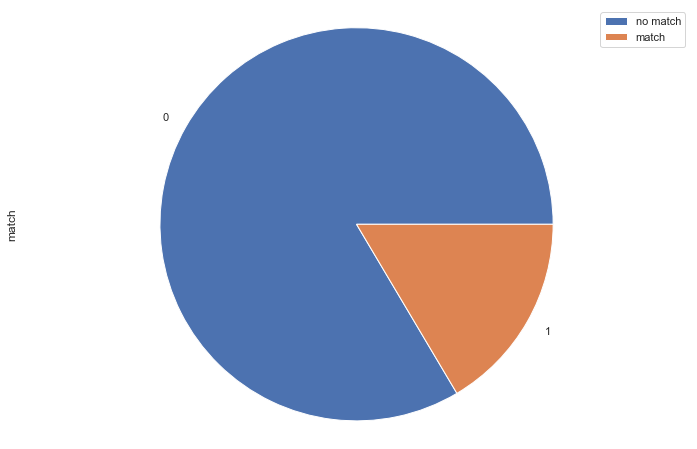

In [397]:
#Before we filter let's count how many people got a match and did not
print(dt['match'].value_counts())
#look at total percentage of people who actually got a match (1=match, 0=no match)
p_success=dt.match.sum()/dt.match.count()
print(p_success*100)
#The rate of success in these events are about 16.5% so not very high

#Pie Chart showing match

plt.figure(figsize = (12,8))
dt['match'].value_counts().plot.pie()
plt.axis('equal')
plt.legend(['no match', 'match'])
#Sets and adjust plots with equal size ratio
plt.show()

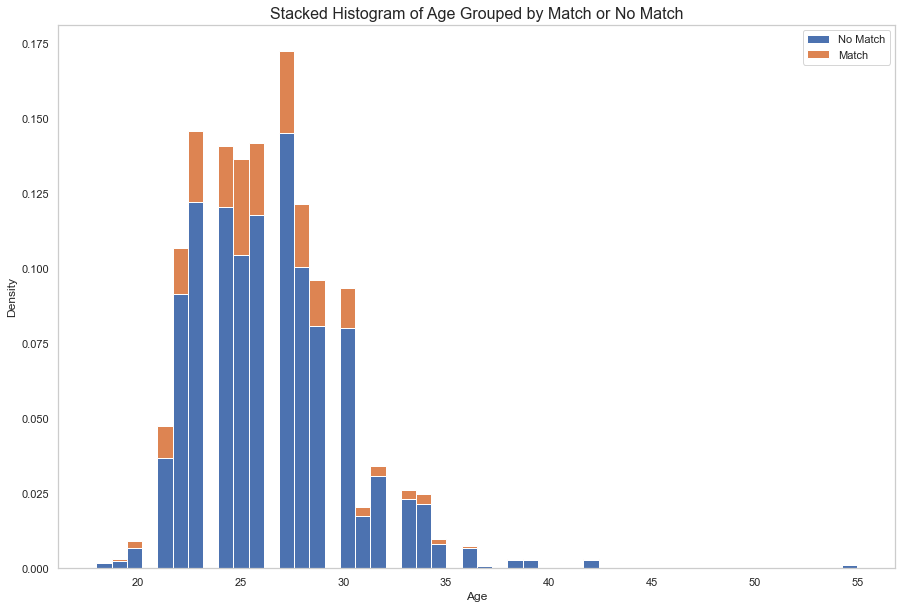

In [398]:
# Let's see how the matches vary by age
#Stacked histogram of the frequency of matches by age
#People who are older have proportionally less matches
dt_agg = dt[['age','match']].groupby('match')
value = [dt['age'].values.tolist() for i, dt in dt_agg]

plt.figure(figsize=[15, 10])
plt.hist(value, 50, stacked=True, label = ['No Match','Match'], density=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Stacked Histogram of Age Grouped by Match or No Match', fontsize = 16)
plt.grid()
plt.show()

In [399]:
# Filter the dataset by the relevant columns 

#Participant id,match status,correlation with their date's interests, their age and income
dt_1 = dt.iloc[:, [11,12,13,33,44]]

#Participant's date's rating of attributes in participant
dt_2 = dt.iloc[:, 23:30]

#Date's rating of how much they like the participant, how probable they will say yes
dt_3 = dt.iloc[:, 30:32]

#Participants' rating of attributes importance to them (out of 10)
dt_4 = dt.iloc[:, 69:75]

#Participant's decision and rating of their date's attributes
dt_5 = dt.iloc[:, 97:104]

#Participant's rating of how much they like their date, how probable they will say yes
dt_6 = dt.iloc[:, 104:106]

#Combine the variables into one
dt_filt = pd.concat([dt.iloc[:, 0],dt.iloc[:, 2],dt_1,dt_2,dt_3,dt_4,dt_5,
                  dt_6], axis=1)

In [401]:
#Drop the rows with NA values since we want complete observations for each individual (don't want to guess their ratings)
dt_clean = dt_filt.dropna().reset_index(drop=True)
dt_clean.head(10)

,iid,gender,pid,match,int_corr,age,income,dec_o,attr_o,sinc_o,...,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob
0,1,0,11.0,0,0.14,21.0,69487.0,0,6.0,8.0,...,15.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,0,12.0,0,0.54,21.0,69487.0,0,7.0,8.0,...,15.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,0,14.0,1,0.61,21.0,69487.0,1,7.0,8.0,...,15.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
3,1,0,15.0,1,0.21,21.0,69487.0,1,8.0,7.0,...,15.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0
4,1,0,16.0,0,0.25,21.0,69487.0,1,7.0,7.0,...,15.0,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0
5,1,0,17.0,0,0.34,21.0,69487.0,0,3.0,6.0,...,15.0,1,7.0,6.0,7.0,4.0,6.0,7.0,6.0,5.0
6,1,0,18.0,0,0.50,21.0,69487.0,0,6.0,7.0,...,15.0,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0,7.0
7,1,0,19.0,1,0.28,21.0,69487.0,1,7.0,7.0,...,15.0,1,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0
8,1,0,20.0,0,-0.36,21.0,69487.0,0,6.0,6.0,...,15.0,1,5.0,6.0,6.0,8.0,10.0,8.0,6.0,6.0
9,2,0,11.0,0,0.29,24.0,65929.0,0,8.0,7.0,...,5.0,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0


In [402]:
#Look at summary of cleaned data
dt_clean.describe()

,iid,gender,pid,match,int_corr,age,income,dec_o,attr_o,sinc_o,...,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob
count,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,...,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,270.326942,0.414733,273.301715,0.184662,0.195274,25.774302,45850.944164,0.472923,6.367945,7.162630,...,11.694235,0.410696,6.217289,7.324756,7.544400,6.423983,6.890851,5.432055,6.150252,5.179953
std,159.317691,0.492759,160.670033,0.388088,0.301651,3.518723,17369.982386,0.499350,1.902681,1.711101,...,5.602815,0.492043,1.923559,1.691231,1.517744,1.962409,1.799117,2.111884,1.843660,2.177652
min,1.000000,0.000000,1.000000,0.000000,-0.830000,18.000000,8607.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,144.000000,0.000000,144.000000,0.000000,-0.020000,23.000000,32159.000000,0.000000,5.000000,6.000000,...,10.000000,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,4.000000
50%,259.000000,0.000000,270.000000,0.000000,0.210000,25.000000,45300.000000,0.000000,6.000000,7.000000,...,10.260000,0.000000,6.000000,7.000000,8.000000,7.000000,7.000000,5.000000,6.000000,5.000000
75%,405.000000,1.000000,410.000000,0.000000,0.430000,28.000000,55080.000000,1.000000,8.000000,8.000000,...,15.000000,1.000000,8.000000,8.000000,9.000000,8.000000,8.000000,7.000000,7.000000,7.000000
max,551.000000,1.000000,552.000000,1.000000,0.900000,55.000000,109031.000000,1.000000,10.000000,10.000000,...,30.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [403]:
#Change binary variables to their corresponding categorical value to clarify interpretation
#Create a copy to do more exploratory data analysis

dt_ed=dt_clean.copy()
dt_ed['gender'][dt_ed['gender'] == 0] = 'female'
dt_ed['gender'][dt_ed['gender'] == 1] = 'male'

dt_ed['match'][dt_ed['match'] == 0] = 'no match'
dt_ed['match'][dt_ed['match'] == 1] = 'match'

dt_ed['dec'][dt_ed['dec'] == 0] = 'Rejected date'
dt_ed['dec'][dt_ed['dec'] == 1] = 'Accepted date'

dt_ed['dec_o'][dt_ed['dec_o'] == 0] = 'Rejected by Date'
dt_ed['dec_o'][dt_ed['dec_o'] == 1] = 'Accepted by Date'

<ipython-input-403-ea902129cd71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_ed['gender'][dt_ed['gender'] == 0] = 'female'
<ipython-input-403-ea902129cd71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_ed['match'][dt_ed['match'] == 0] = 'no match'
<ipython-input-403-ea902129cd71>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_ed['dec'][dt_ed['dec'] == 0] = 'Rejected date'
<ipython-input-403-ea902129cd71>:12: Setting

Text(0.5, 1.0, 'Distribution of Matches by Gender')

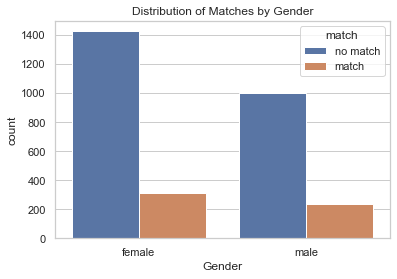

In [404]:
#Let's look at distribution of matches by gender
#Surprisingly women get less matches proportionally than men

sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="gender", hue= "match", data=dt_ed)
plt.xlabel('Gender')
plt.title('Distribution of Matches by Gender')

Text(0.5, 1.0, 'Acceptance by Date for Gender')

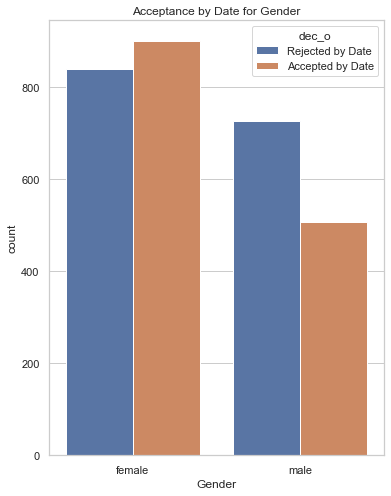

In [405]:
#However when you look at rejection vs acceptance between men and women,
#Women are much more likely to be accepted by their date than men

plt.subplots(figsize=(6,8))
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="gender", hue= "dec_o", data=dt_ed)
plt.xlabel('Gender')
plt.title('Acceptance by Date for Gender')

Text(0.5, 1.0, 'Decision to accept or reject Date by Gender')

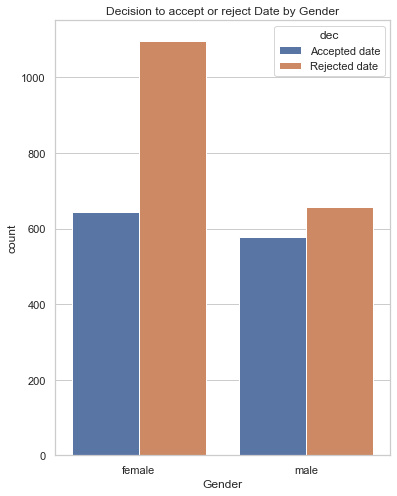

In [406]:
#Decision to accept or reject by Gender
plt.subplots(figsize=(6,8))
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="gender", hue= "dec", data=dt_ed)
plt.xlabel('Gender')
plt.title('Decision to accept or reject Date by Gender')

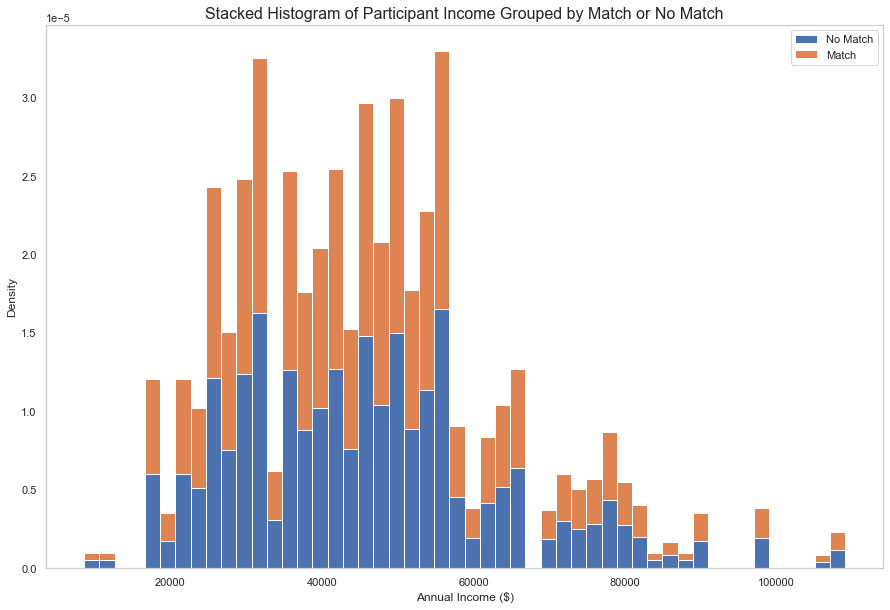

In [407]:
# Let's see how the matches vary by income
#Stacked histogram of the frequency of matches by income
#Surprisingly, people's income bracket do not seem to have a significant impact on matches
dt_income = dt_ed[['income','match']].groupby('match')
value = [dt_ed['income'].values.tolist() for i, dt in dt_income]

plt.figure(figsize=[15, 10])
plt.hist(value, 50, stacked=True, label = ['No Match','Match'], density=True)
plt.legend()
plt.xlabel('Annual Income ($)')
plt.ylabel('Density')
plt.title('Stacked Histogram of Participant Income Grouped by Match or No Match', fontsize = 16)
plt.grid()
plt.show()

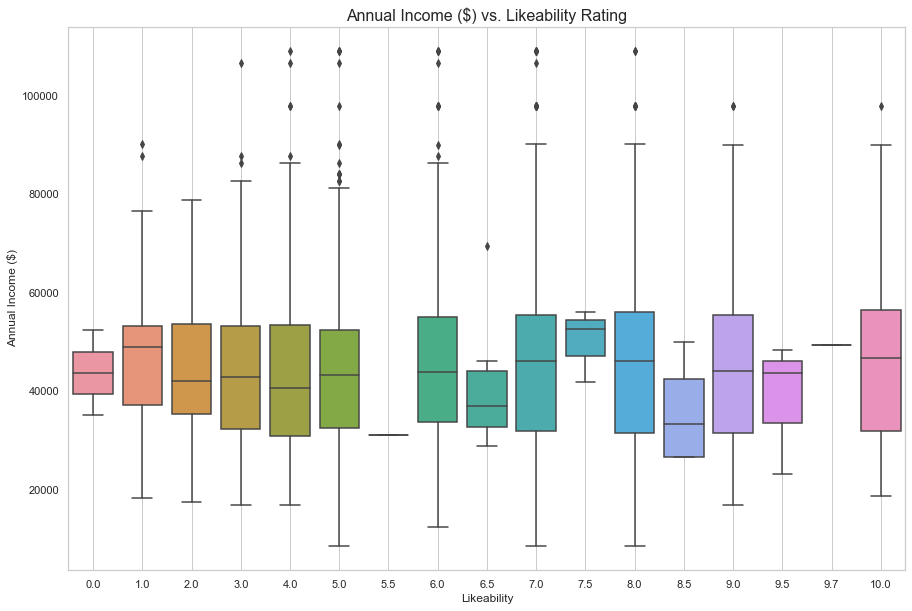

In [408]:
# Let's see how the likeable the person is rated by their date vary by income
plt.figure(figsize=[15, 10])
sns.boxplot(x='like_o', y = 'income', data = dt_ed)
plt.xlabel('Likeability')
plt.ylabel('Annual Income ($)')
plt.title('Annual Income ($) vs. Likeability Rating', fontsize = 16)
plt.grid()
plt.show()

In [410]:
#Let's look at how the importance of different attributes are ranked across genders:
#Group by gender and calculate mean rating
var_imp=dt_ed.groupby('gender').mean()[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].reset_index()
var_imp.columns=['Gender','Attraction', 'Sincerity','Intelligence','Fun','Ambition','Shared_Interests'] 
print(var_imp)

   Gender  Attraction  Sincerity  Intelligence        Fun   Ambition  \
0  female   18.102862  17.893103     21.099557  17.576454  13.169184   
1    male   25.547762  16.641760     19.553325  18.339805   8.846594   

   Shared_Interests  
0         12.194052  
1         10.988897  


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1800x720 with 0 Axes>

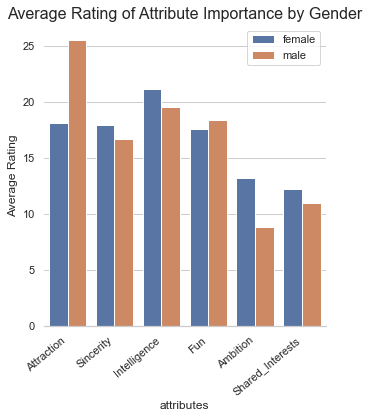

In [411]:
#Manipulate data to plot in one graph
var_imp2 = pd.melt(var_imp, id_vars="Gender", var_name="attributes", value_name="mean")
plt.figure(figsize=[25, 10])
ax=sns.factorplot(x='attributes', y='mean', hue='Gender', data=var_imp2, kind='bar',legend=False)
ax.set_xticklabels(rotation=40, ha="right")
ax.despine(left=True)
plt.legend(loc='upper right')
plt.ylabel('Average Rating')
plt.title('Average Rating of Attribute Importance by Gender', fontsize = 16)
plt.show()

Text(0, 0.5, 'Attractiveness of Date')

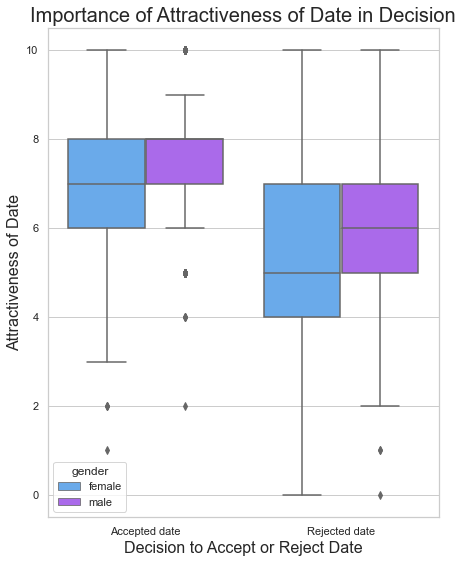

In [412]:
# looking at accceptance/rejection by attractiveness attribute
plt.figure(figsize=(7,9))
sns.boxplot(x='dec', y='attr', data=dt_ed, palette='cool',hue='gender')
plt.title('Importance of Attractiveness of Date in Decision', fontsize=20)
plt.xlabel('Decision to Accept or Reject Date', fontsize=16)
plt.ylabel('Attractiveness of Date', fontsize=16)

Text(0, 0.5, 'Intelligence of Date')

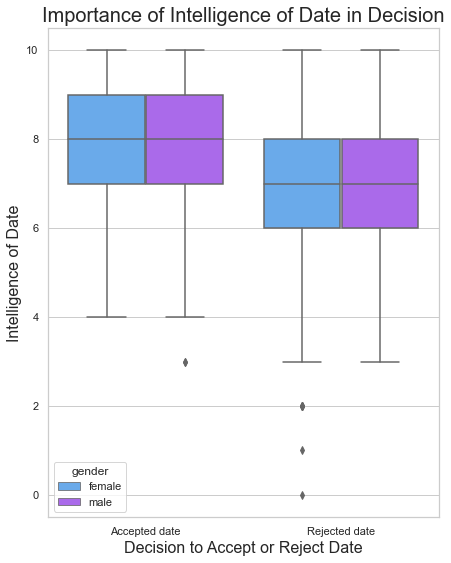

In [413]:
# looking at rejection by intelligence attribute
plt.figure(figsize=(7,9))
sns.boxplot(x='dec', y='intel', data=dt_ed, palette='cool',hue='gender')
plt.title('Importance of Intelligence of Date in Decision', fontsize=20)
plt.xlabel('Decision to Accept or Reject Date', fontsize=16)
plt.ylabel('Intelligence of Date', fontsize=16)

Text(0, 0.5, 'Ambition of Date')

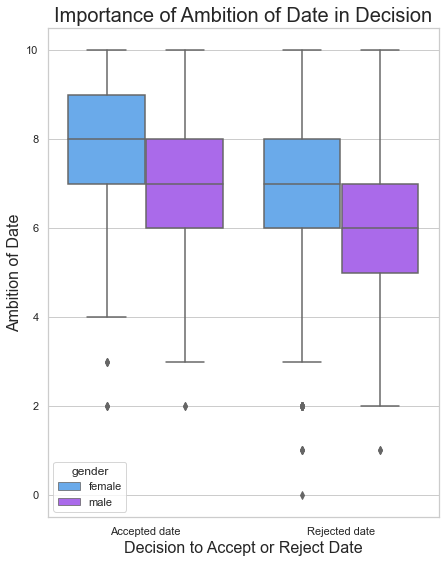

In [414]:
# looking at rejection by ambition attribute
plt.figure(figsize=(7,9))
sns.boxplot(x='dec', y='amb', data=dt_ed, palette='cool',hue='gender')
plt.title('Importance of Ambition of Date in Decision', fontsize=20)
plt.xlabel('Decision to Accept or Reject Date', fontsize=16)
plt.ylabel('Ambition of Date', fontsize=16)

Text(0, 0.5, 'Sincerity of Date')

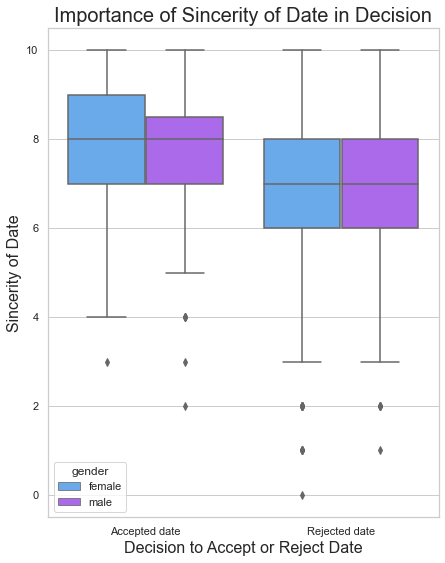

In [415]:
# looking at rejection by sincerity attribute
plt.figure(figsize=(7,9))
sns.boxplot(x='dec', y='sinc', data=dt_ed, palette='cool',hue='gender')
plt.title('Importance of Sincerity of Date in Decision', fontsize=20)
plt.xlabel('Decision to Accept or Reject Date', fontsize=16)
plt.ylabel('Sincerity of Date', fontsize=16)

Text(0, 0.5, 'Fun-ness of Date')

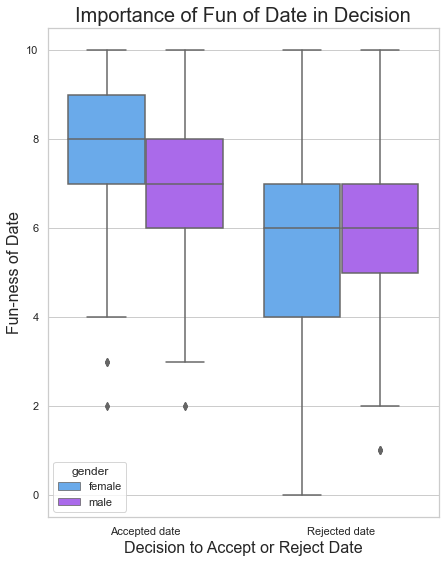

In [416]:
# looking at rejection by fun attribute
plt.figure(figsize=(7,9))
sns.boxplot(x='dec', y='fun', data=dt_ed, palette='cool',hue='gender')
plt.title('Importance of Fun of Date in Decision', fontsize=20)
plt.xlabel('Decision to Accept or Reject Date', fontsize=16)
plt.ylabel('Fun-ness of Date', fontsize=16)

Text(0.5, 0, 'Decision to Accept or Reject Date')

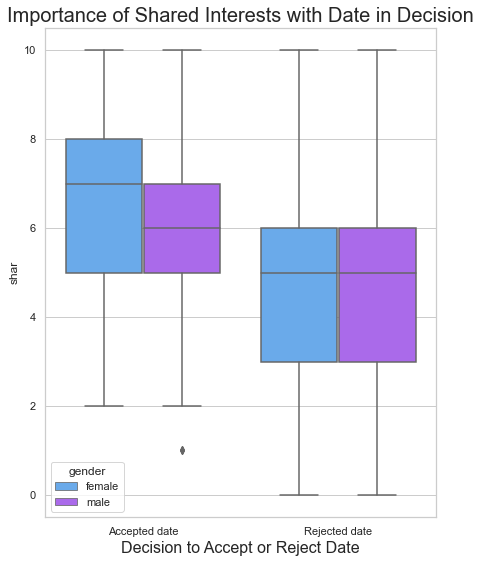

In [417]:
# looking at rejection by shared interests attribute
plt.figure(figsize=(7,9))
sns.boxplot(x='dec', y='shar', data=dt_ed, palette='cool',hue='gender')
plt.title('Importance of Shared Interests with Date in Decision', fontsize=20)
plt.xlabel('Decision to Accept or Reject Date', fontsize=16)

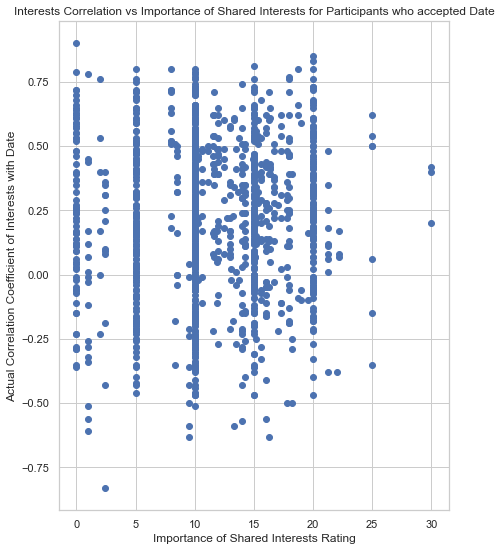

In [418]:
#Let's look at the relationship between shared interests correlation and importance of shared interests to the participant 
#Found no distinct relationship between importance and actual shared interest with date
yestodate=dt_ed.loc[dt_ed['dec'] == 'Accepted date']
plt.figure(figsize=(7,9))
plt.scatter(yestodate.shar1_1,yestodate.int_corr)
plt.xlabel('Importance of Shared Interests Rating')
plt.ylabel('Actual Correlation Coefficient of Interests with Date')
plt.title('Interests Correlation vs Importance of Shared Interests for Participants who accepted Date')
plt.show()

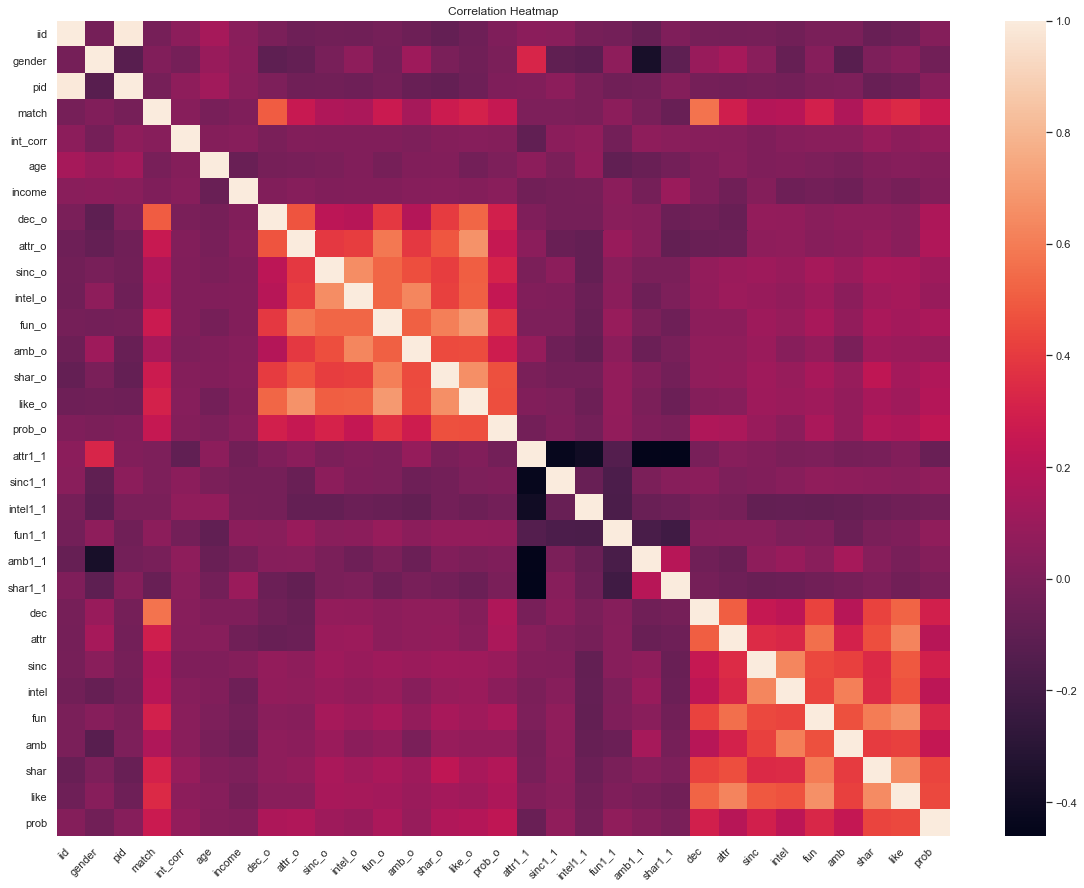

In [91]:
#Plot correlation heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = dt_clean.corr()
corrplot=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right') #For X axis labels
plt.show()

In [12]:
#At first glance, it is clear that the 6 attributes (attractiveness, sincerity, intelligence,fun, and ambition, shared interests) are 
#positively correlated with each other and with the decision and match variable.
#Gender also play a role; males ranking attractiveness very highly while females prefer ambitious partners.
#The ranking of attributes also differ, people who rate attractiveness as very important tend to value fun more than intelligence, ambition, or sincerity.

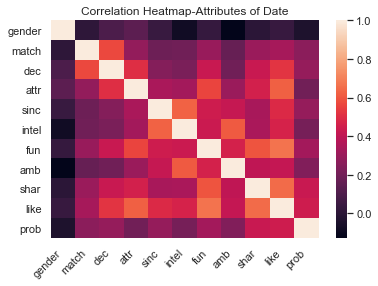

In [385]:
#Let's examine these attributes variables closer (from participant point of view) with closeup of the correlation graph

dt_ed2 = pd.concat([dt_clean.iloc[:, 1],dt_clean.iloc[:, 3],dt_clean.iloc[:, 22:31]], axis=1)
dt_ed2
corr2=dt_ed2.dropna().corr()
ax = plt.axes()
ax.set_title("Correlation Heatmap-Attributes of Date")
corrplot2=sns.heatmap(corr2, 
        xticklabels=corr2.columns.values,
          yticklabels=corr2.columns.values)
corrplot2.set_xticklabels(corrplot2.get_xticklabels(), rotation = 45, horizontalalignment = 'right') #For X axis labels
plt.show()

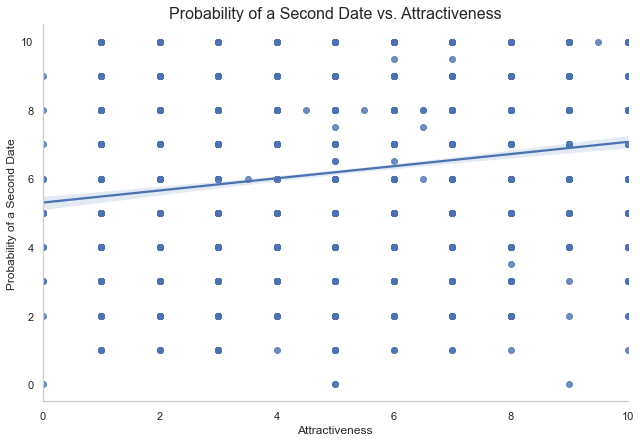

In [391]:
#Relationship between date being attractive and probability of a second date
prob_attr = sns.lmplot(x = 'prob', y = 'attr', data = dt_ed2, height = 6, aspect = 1.5)
plt.xlabel('Attractiveness')
plt.ylabel('Probability of a Second Date')
plt.title('Probability of a Second Date vs. Attractiveness', fontsize = 16)
plt.grid()
plt.show()

# Conclusion
In this data analysis, we explored data from a speed dating analysis and looked at variables which may tell us what attributes people desire in a potential partner, and how the match making process differs across groups. Overall, only 16.5% of all participants found a match, which shows that find a date is not easy! It gets even harder as people get older, with proportion of matches over age 35 dropping steeply. 

A surprising finding is that women are less likely to find a match than men. But that is because women are much more picky than men and more likely to reject their date. 
Per popular belief, men tend to see attractiveness as the most important attribute in a partner, while for women it is intelligence. However, they are the top two attributes for both men and women. 

These are the rankings of the 6 attributes according to gender: <br>
Female: Intelligence>Attractiveness>Sincerity>Fun>Ambition>Shared Interests <br>
Male: Attractiveness>Intelligence>Fun>Sincerity>Shared Interests>Ambition

We can conclude from the data that one’s income does not significantly impact a person’s chances of finding a match. The proportion of matches do not differ noticeably for those at the higher income levels. We can assume perhaps at least on the first few dates it’s true, when it is hard to assess someone’s financial status. Again, when it comes to likeability, there is no noticeable impact for top earners; rich or poor, you can still have great (or lacklustre) appeal.

Finally, when people say they want a partner with common interests, it is not necessarily reflected in their final decision. The data showed no distinct relationship between how highly shared interests are ranked by the participant and their decision to accept a date who shares their interests. Attributes are also correlated with each other; people who rate attractiveness as very important tend to also value fun more than intelligence, ambition, or sincerity. Logically, the more fun a person is the more likeable they are perceived, but when it comes to getting picked for a second date, being attractive still is a better predictor.

In general, the dataset showed a rather superficial view of the dating scene and supports the belief that good looks trumps personality a lot of the time. However keep in mind this is in the context of speed dating and may not translate directly to the longevity of a long term relationship. 

